In [ ]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time

### Creation of dataset

In [ ]:
k = 2
size = 10000
seed = 42

In [ ]:
dim = 2
torch.manual_seed(seed)
X = torch.rand(size, dim)
X.shape

torch.Size([10000, 2])

In [ ]:
Labels = torch.zeros(size)
Labels.shape

torch.Size([10000])

In [ ]:
random.seed(seed)
Centers = torch.stack([X[random.randint(0,size)] for _ in range(k)])
Colors = [i for i in range(k)]
Centers.shape

torch.Size([2, 2])

In [ ]:
def euclide_fn(plan_matrix=X, centers=Centers, classes=k, dims=dim):
    tmp_tensor = torch.zeros(size,classes)
    #print(tmp_tensor.shape, plan_matrix.shape, centers.shape)
    for i in range(classes):
        tmp_tensor[:,i]=torch.sum((plan_matrix - centers[i].unsqueeze(dim=0))**2, dim=1)
    return tmp_tensor.argmin(dim=1)

In [ ]:
def visualize(plan_matrix=X, labels=Labels, centers=Centers,classes=k, dims=dim, true_labels=Colors):
    plt.scatter(plan_matrix[:,0],plan_matrix[:,1], c=labels, cmap='brg')
    plt.scatter(centers[:,0],centers[:,1], s=300, c=true_labels, cmap='brg', alpha=0.9, marker='x')

In [ ]:
def step(plan_matrix=X, centers=Centers, labels=Labels, classes=k, dims=dim, size=size, true_labels=Colors):
    new_centers = torch.zeros(classes,dims)
    #print(labels.shape, plan_matrix.shape, centers.shape)
    #print(torch.eq(labels,torch.full((1,size),true_labels[0]).squeeze()).shape)
    for i in range(classes):
        tmp = torch.eq(torch.vstack((Labels,Labels)).T,torch.full((size,dims),true_labels[i]))
        new_centers[i]= torch.sum(tmp * plan_matrix, dim=0) / sum(tmp)
    #print(new_centers)
    return new_centers

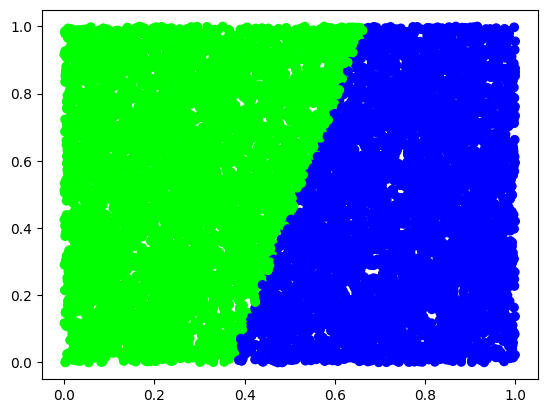

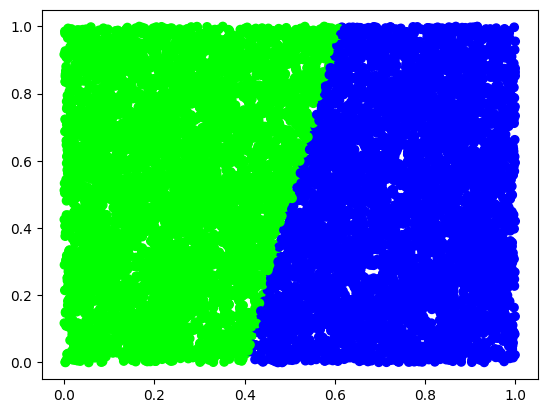

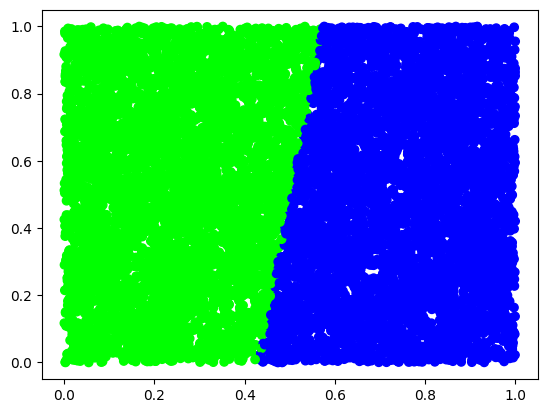

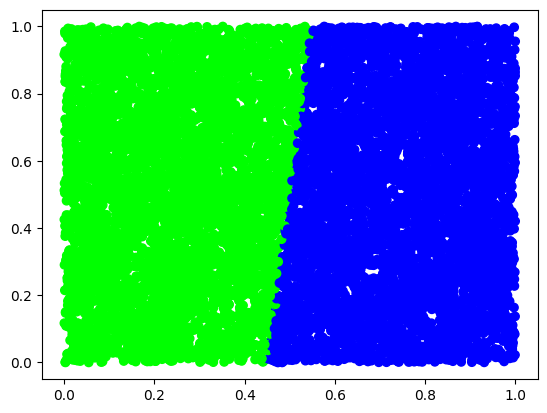

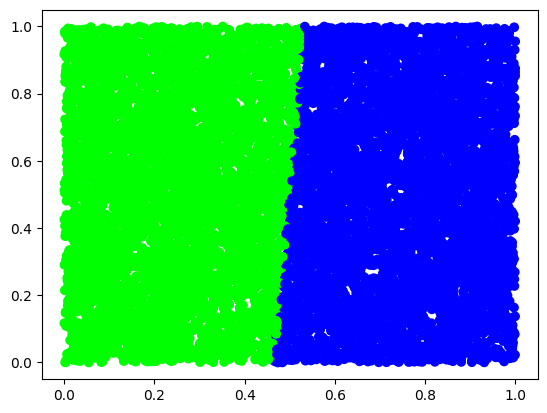

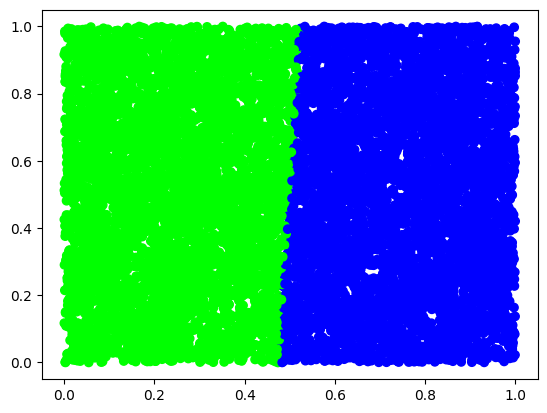

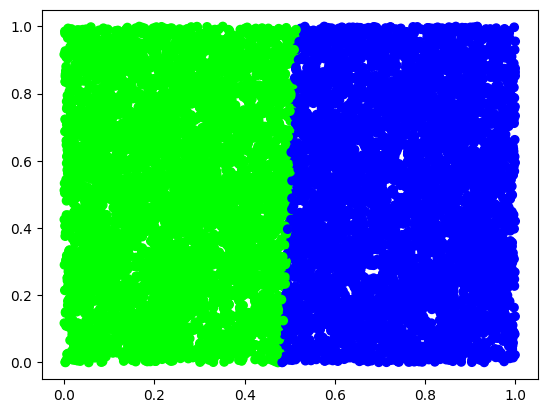

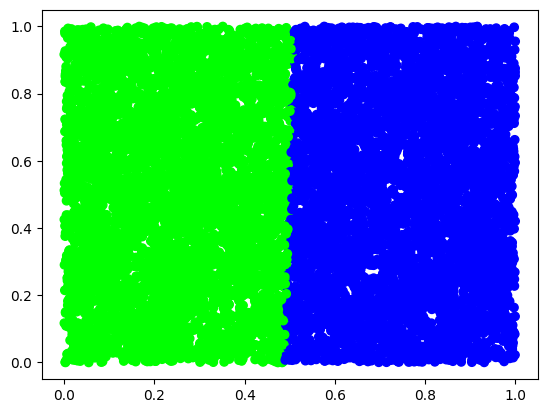

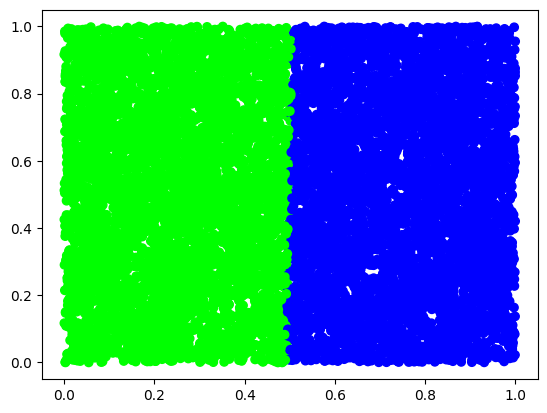

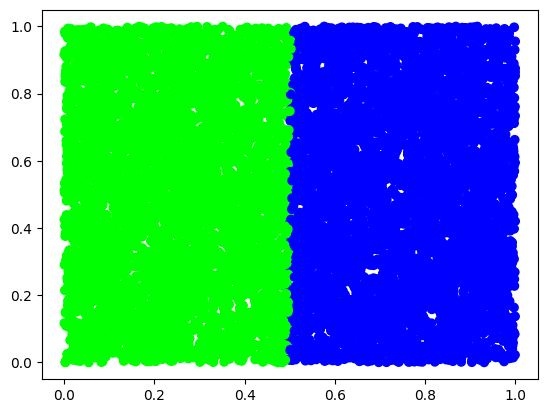

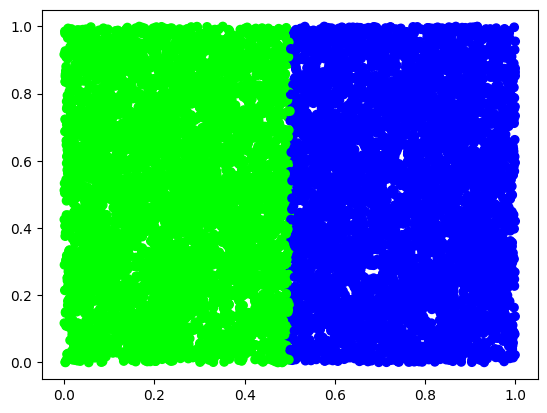

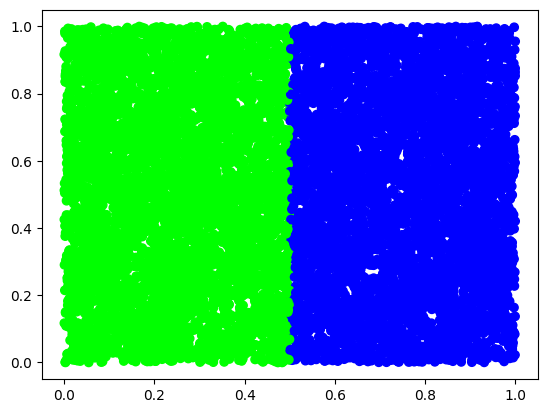

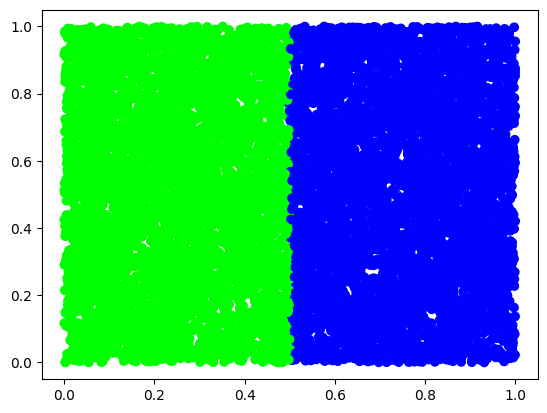

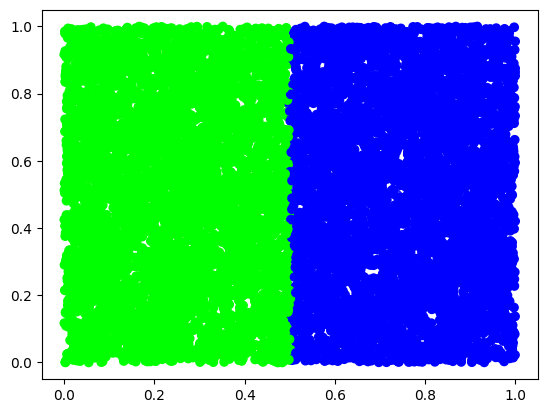

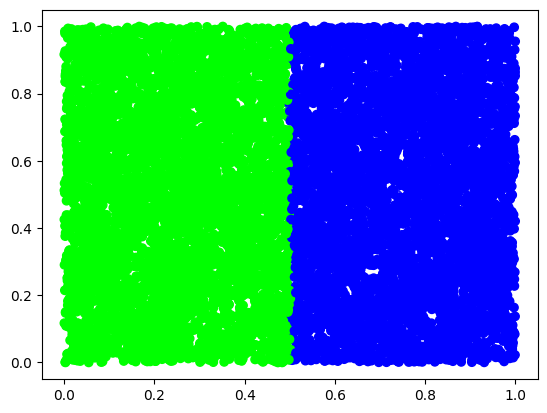

In [ ]:
flag = True
#plt.ion()
while flag:
    Labels = euclide_fn(centers=Centers)
    #plt.clf()

    visualize(labels=Labels, centers=Centers)
    plt.show()
    #plt.draw()
    #plt.gcf().canvas.flush_events()
    new_centers = step(centers=Centers, labels=Labels)

    if torch.sum(torch.eq(new_centers,Centers)) == dim*k:
        flag = False
    else:
        Centers = new_centers
    time.sleep(0.2)
#plt.ioff()

### Bias

In [ ]:
from math import pi
from math import exp

In [ ]:
seed = 42
Length = 1000
PC0 = random.random()
PC1 = 1 - PC0

In [ ]:
X.shape, Labels.shape

(torch.Size([10000, 2]), torch.Size([10000]))

In [ ]:
E0 = torch.mean(X[Labels == 0]).item()
E1 = torch.mean(X[Labels == 1]).item()
E0, E1

(0.6245977878570557, 0.37189456820487976)

In [ ]:
S0 = torch.sqrt(torch.var(X[Labels == 0])).item()
S1 = torch.sqrt(torch.var(X[Labels == 1])).item()
S0, S1

(0.26237815618515015, 0.25824519991874695)

In [ ]:
X_t = torch.linspace(start=0,end=1,steps=Length)
X_t.shape

torch.Size([1000])

In [ ]:
P0 = torch.ones(Length)
P1 = torch.zeros(Length)

In [ ]:
def normal_p(value, E, sigma):
  return 1 / (sigma * (2 * pi) ** 0.5) * exp(-1 / 2 * ((value - E) / sigma) ** 2)

In [ ]:
for i in range(Length):
  P0[i] = PC0 * normal_p(value=X_t[i], E=E0, sigma=S0)

In [ ]:
for i in range(Length):
  P1[i] = PC1 * normal_p(value=X_t[i], E=E1, sigma=S1)

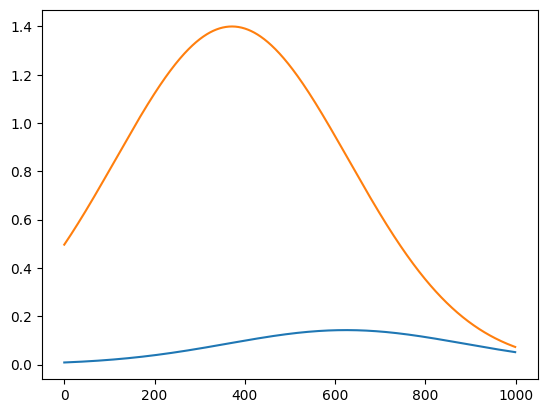

In [ ]:
plt.plot(P0)
plt.plot(P1)

In [ ]:
X_star = torch.argmax(torch.isclose(P0,P1, rtol=1e-2).type(torch.float)).item()
X_star

0

In [ ]:
lt_cof = 0
po_cof = 0

In [ ]:
for i in range(X_star+1):
  lt_cof += PC1 * normal_p(value=X_t[i], E=E1, sigma=S1)

In [ ]:
for i in range(X_star,Length):
  po_cof += PC0 * normal_p(value=X_t[i], E=E0, sigma=S0)

In [ ]:
lt_cof, po_cof = lt_cof / Length, po_cof / Length

In [ ]:
lt_cof, po_cof

(0.0004963906121118295, 0.08568523981984716)

In [ ]:
soc = lt_cof + po_cof

In [ ]:
print(f'Вероятность ложной тревоги: {lt_cof}')
print(f'Вероятность пропуска обнаружения: {po_cof}')
print(f'Суммарная ошибка классификации: {soc}')

Вероятность ложной тревоги: 0.0004963906121118295
Вероятность пропуска обнаружения: 0.08568523981984716
Суммарная ошибка классификации: 0.08618163043195899
